#Import

In [ ]:
from sympy import symbols, sin, cos, diff, simplify

# Define symbols
x, y, L = symbols('x y L')

# Define expressions
mu = 1+x+y
la = L * (1 + sin(2*x)/2)
u = (cos(2*x) - 1)*sin(2*y) + sin(x)*sin(y)/L
v = (1 - cos(2*y))*sin(2*x) + sin(x)*sin(y)/L

# Compute derivatives
ux = diff(u, x)
uy = diff(u, y)
vx = diff(v, x)
vy = diff(v, y)

# Compute f1
term1 = diff((la + 2*mu)*ux + la*vy, x)
term2 = diff(mu*(uy + vx), y)
f1 = - (term1 + term2)

# Compare it with my f1
def g3(x,y):
  return  2*(2*sin(2*x)*sin(2*y) - cos(2*x) + cos(2*y)) + 4*mu*sin(2*y)*(2*cos(2*x) - 1)

g2 = (1 + sin(2*x)/2)*cos(x + y)

def g1(x,y):
  return  mu*(2*sin(x)*sin(y) - cos(x + y)) - sin(x + y) - 2*cos(x)*sin(y)

# my f1, I will call it f1c
f1c = g3(x,y) - g2 - cos(2*x)*sin(x + y) + g1(x,y)/L

# Compute the difference. If the answer is zero, then my computation is correct
Diff1 = simplify(f1 - f1c)
print(Diff1)


# Compute f2
term3 = diff((la + 2*mu)*vy + la*ux, y)
term4 = diff(mu*(uy + vx), x)
f2 = - (term3 + term4)


# my f2, I will call it f2c
f2c = -g2 - g3(y,x) + g1(y,x)/L

# Compute the difference. If the answer is zero, then my computation is correct
Diff2 = simplify(f2 - f2c)
print(Diff2)

0
0


In [ ]:
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable
# import random

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda:0


#Build Network

In [ ]:
delta = 1
pi = torch.pi

class Swish(nn.Module):
    def __init__(self):
        super().__init__()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return  x* self.sigmoid(x)

class ReLUCubed(nn.Module):
    def __init__(self):
        super(ReLUCubed, self).__init__()

    def forward(self, x):
        return torch.maximum(torch.zeros_like(x), (x) ** 3)

activation = nn.GELU()
activation_ = torch.tanh

In [ ]:
M = 64
selu = Swish()

T = True
F = False

class Net_2D(nn.Module):
    def __init__(self):
        super(Net_2D, self).__init__()
        torch.manual_seed(1234) # Fix Initial_Parameter
        self.hidden_layer1 = nn.Linear(2,M, bias = T)
        torch.manual_seed(1234)
        self.hidden_layer2 = nn.Linear(M,M, bias = T)
        torch.manual_seed(1234)
        self.hidden_layer3 = nn.Linear(M,M, bias = T)
        torch.manual_seed(1234)
        self.hidden_layer4 = nn.Linear(M,M, bias = T)
        torch.manual_seed(1234)
        self.output_layer = nn.Linear(M,2, bias = T)

    def forward(self, x,y):
        inputs = torch.cat([x,y],axis=1)
        layer1_out = activation(self.hidden_layer1(inputs))
        layer2_out = activation(self.hidden_layer2(layer1_out))
        layer3_out = activation(self.hidden_layer3(layer2_out))
        layer4_out = activation(self.hidden_layer4(layer3_out))
        output = self.output_layer(layer4_out)

        return output

class Net_2D_f(nn.Module):
    def __init__(self):
        super(Net_2D_f, self).__init__()
        torch.manual_seed(1234) # Fix Initial_Parameter
        self.hidden_layer1 = nn.Linear(2,M, bias = T)
        torch.manual_seed(1234)
        self.hidden_layer2 = nn.Linear(M,M, bias = T)
        torch.manual_seed(1234)
        self.hidden_layer3 = nn.Linear(M,M, bias = T)
        torch.manual_seed(1234)
        self.hidden_layer4 = nn.Linear(M,M, bias = T)
        torch.manual_seed(1234)
        self.output_layer = nn.Linear(M,2, bias = T)

    def forward(self, x,y):
        inputs = torch.cat([x,y],axis=1)
        layer1_out = activation_(self.hidden_layer1(inputs))
        layer2_out = activation_(self.hidden_layer2(layer1_out))
        layer3_out = activation_(self.hidden_layer3(layer2_out))
        layer4_out = activation_(self.hidden_layer4(layer3_out))
        output = self.output_layer(layer4_out)

        return output

#loss,optimize

In [ ]:
import torch
import torch.nn.init as init

### (2) Model
mse_cost_function = torch.nn.MSELoss() #MSE Function can be shared

net_2d_1 = Net_2D()
net_2d_1 = net_2d_1.to(device)

net_2d_2 = Net_2D()
net_2d_2 = net_2d_2.to(device)

net_2d_f = Net_2D_f()
net_2d_f = net_2d_f.to(device)

net_2d_f0 = Net_2D_f()
net_2d_f0 = net_2d_f0.to(device)

optimizer1 = torch.optim.Adam(net_2d_1.parameters(),lr=0.001)
optimizer2 = torch.optim.Adam(net_2d_2.parameters(),lr=0.001)
optimizerf = torch.optim.Adam(net_2d_f.parameters(),lr=0.001)
optimizerf0 = torch.optim.Adam(net_2d_f0.parameters(),lr=0.001)

#set PDE,residual
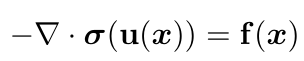

In [ ]:
N = 1
C = 0.05
lamb = 10000
mu = 1
cos = torch.cos
sin = torch.sin

#/ 10,0.1 / 100,0.05 / 1000,0.01 / 10000,0.05 / 100000,0.01 / 1000000,0.001

def f(x,y,x_bd,y_bd, net1, net2, net3, net4, epoch):
    var_mu = 1 + x + y
    var_mu_x = 1
    var_mu_y = 1
    var_lamb = lamb*(1+0.5*torch.sin(2*x))
    var_lamb_x = lamb*torch.cos(2*x)

    f1 = (2*(2*sin(2*x)*sin(2*y)-cos(2*x)+cos(2*y))+4*var_mu*sin(2*y)*(2*cos(2*x)-1)) - (1+0.5*sin(2*x))*cos(x+y) - cos(2*x)*sin(x+y) + (1/lamb)*(var_mu*(2*sin(x)*sin(y)-cos(x+y))-sin(x+y)-2*cos(x)*sin(y))
    f2 = -(2*(2*sin(2*y)*sin(2*x)-cos(2*y)+cos(2*x))+4*var_mu*sin(2*x)*(2*cos(2*y)-1)) - (1+0.5*sin(2*x))*cos(x+y) + (1/lamb)*(var_mu*(2*sin(y)*sin(x)-cos(x+y))-sin(y+x)-2*cos(y)*sin(x))

    # print((f1_-f1).mean())
    # print((f2_-f2).mean())

    w1 = net1(x,y)[:, 0:1]
    v1 = net1(x,y)[:, 1:2] #u_tilda

    w2 = net2(x,y)[:, 0:1]
    v2 = net2(x,y)[:, 1:2] #u_hat

    net_f1 = net3(x,y)[:, 0:1]
    net_f2 = net3(x,y)[:, 1:2] #f_hat

    net_f1_0 = net4(x,y)[:, 0:1]
    net_f2_0 = net4(x,y)[:, 1:2] #f_0

    w1_bdy = net1(x_bd,y_bd)[:, 0:1]
    v1_bdy = net1(x_bd,y_bd)[:, 1:2]

    w2_bdy = net2(x_bd,y_bd)[:, 0:1]
    v2_bdy = net2(x_bd,y_bd)[:, 1:2]

    w1_x = torch.autograd.grad(w1.sum(), x, create_graph=True)[0]
    w1_y = torch.autograd.grad(w1.sum(), y, create_graph=True)[0]
    w1_xx = torch.autograd.grad(w1_x.sum(), x, create_graph=True)[0]
    w1_yy = torch.autograd.grad(w1_y.sum(), y, create_graph=True)[0]
    w1_xy = torch.autograd.grad(w1_x.sum(), y, create_graph=True)[0]

    v1_x = torch.autograd.grad(v1.sum(), x, create_graph=True)[0]
    v1_y = torch.autograd.grad(v1.sum(), y, create_graph=True)[0]
    v1_xx = torch.autograd.grad(v1_x.sum(), x, create_graph=True)[0]
    v1_yy = torch.autograd.grad(v1_y.sum(), y, create_graph=True)[0]
    v1_xy = torch.autograd.grad(v1_x.sum(), y, create_graph=True)[0]

    w2_x = torch.autograd.grad(w2.sum(), x, create_graph=True)[0]
    w2_y = torch.autograd.grad(w2.sum(), y, create_graph=True)[0]
    w2_xx = torch.autograd.grad(w2_x.sum(), x, create_graph=True)[0]
    w2_yy = torch.autograd.grad(w2_y.sum(), y, create_graph=True)[0]
    w2_xy = torch.autograd.grad(w2_x.sum(), y, create_graph=True)[0]

    v2_x = torch.autograd.grad(v2.sum(), x, create_graph=True)[0]
    v2_y = torch.autograd.grad(v2.sum(), y, create_graph=True)[0]
    v2_xx = torch.autograd.grad(v2_x.sum(), x, create_graph=True)[0]
    v2_yy = torch.autograd.grad(v2_y.sum(), y, create_graph=True)[0]
    v2_xy = torch.autograd.grad(v2_x.sum(), y, create_graph=True)[0]

    u1_dual_r1 = ((2*var_mu*(w1_xx + 0.5*(v1_xy+w1_yy)) + 2*var_mu_x*w1_x + var_mu_y*(w1_y+v1_x) + net_f1_0 )**2).mean()
    u1_dual_r2 = ((2*var_mu*(v1_yy + 0.5*(v1_xx+w1_xy)) + 2*var_mu_y*v1_y + var_mu_x*(w1_y+v1_x) + net_f2_0 )**2).mean()
    u1_r1 = ((var_lamb_x*(w1_x+v1_y) + var_lamb*(w1_xx+v1_xy) + net_f1)**2).mean()
    u1_r2 = ((var_lamb*(w1_xy+v1_yy) + net_f2)**2).mean()

    u2_r1 = ((2*var_mu*(w2_xx + 0.5*(v2_xy+w2_yy)) + 2*var_mu_x*w2_x + var_mu_y*(w2_y+v2_x) + f1 - net_f1 - net_f1_0 )**2).mean()
    u2_r2 = ((2*var_mu*(v2_yy + 0.5*(v2_xx+w2_xy)) + 2*var_mu_y*v2_y + var_mu_x*(w2_y+v2_x) + f2 - net_f2 - net_f2_0 )**2).mean()
    u2_dual_r1 = (((var_lamb_x*(w2_x+v2_y) + var_lamb*(w2_xx+v2_xy))/lamb)**2).mean()
    u2_dual_r2 = ((var_lamb*(w2_xy+v2_yy)/lamb)**2).mean()

    bdy1_loss = ((w1_bdy + w2_bdy)**2).mean()
    bdy2_loss = ((v1_bdy + v2_bdy)**2).mean()


    return u1_dual_r1 + u1_dual_r2 + C*u1_r1 + C*u1_r2 + u2_dual_r1 + u2_dual_r2 + u2_r1 + u2_r2 + 10*bdy1_loss + 10*bdy2_loss

def f_1(x,y,x_bd,y_bd, net1, epoch):

    var_mu = 1 + x + y
    var_mu_x = 1
    var_mu_y = 1
    var_lamb = lamb*(1+0.5*torch.sin(2*x))
    var_lamb_x = lamb*torch.cos(2*x)

    f1 = (2*(2*sin(2*x)*sin(2*y)-cos(2*x)+cos(2*y))+4*var_mu*sin(2*y)*(2*cos(2*x)-1)) - (1+0.5*sin(2*x))*cos(x+y) - cos(2*x)*sin(x+y) + (1/lamb)*(var_mu*(2*sin(x)*sin(y)-cos(x+y))-sin(x+y)-2*cos(x)*sin(y))
    f2 = -(2*(2*sin(2*y)*sin(2*x)-cos(2*y)+cos(2*x))+4*var_mu*sin(2*x)*(2*cos(2*y)-1)) - (1+0.5*sin(2*x))*cos(x+y) + (1/lamb)*(var_mu*(2*sin(y)*sin(x)-cos(x+y))-sin(y+x)-2*cos(y)*sin(x))

    w1 = net1(x,y)[:, 0:1]
    v1 = net1(x,y)[:, 1:2] #u_tilda

    w1_bdy = net1(x_bd,y_bd)[:, 0:1]
    v1_bdy = net1(x_bd,y_bd)[:, 1:2]

    w1_x = torch.autograd.grad(w1.sum(), x, create_graph=True)[0]
    w1_y = torch.autograd.grad(w1.sum(), y, create_graph=True)[0]
    w1_xx = torch.autograd.grad(w1_x.sum(), x, create_graph=True)[0]
    w1_yy = torch.autograd.grad(w1_y.sum(), y, create_graph=True)[0]
    w1_xy = torch.autograd.grad(w1_x.sum(), y, create_graph=True)[0]

    v1_x = torch.autograd.grad(v1.sum(), x, create_graph=True)[0]
    v1_y = torch.autograd.grad(v1.sum(), y, create_graph=True)[0]
    v1_xx = torch.autograd.grad(v1_x.sum(), x, create_graph=True)[0]
    v1_yy = torch.autograd.grad(v1_y.sum(), y, create_graph=True)[0]
    v1_xy = torch.autograd.grad(v1_x.sum(), y, create_graph=True)[0]

    u_r1 = (((2*var_mu*(w1_xx + 0.5*(v1_xy+w1_yy)) + 2*var_mu_x*w1_x + var_mu_y*(w1_y+v1_x))+(var_lamb_x*(w1_x+v1_y) + var_lamb*(w1_xx+v1_xy)) + f1)**2).mean()
    u_r2 = (((2*var_mu*(v1_yy + 0.5*(v1_xx+w1_xy)) + 2*var_mu_y*v1_y + var_mu_x*(w1_y+v1_x))+(var_lamb)*(w1_xy+v1_yy) + f2)**2).mean()

    bdy1_loss = ((w1_bdy)**2).mean()
    bdy2_loss = ((v1_bdy)**2).mean()


    return C*u_r1 + C*u_r2 + 10*bdy1_loss + 10*bdy2_loss

#Set data point

In [ ]:
x_collocation = np.random.uniform(low = 0 , high = np.pi , size=(5000,1))
y_collocation = np.random.uniform(low = 0 , high = np.pi , size=(5000,1))

pt_x_collocation = Variable(torch.from_numpy(x_collocation).float(), requires_grad=True).to(device)
pt_y_collocation = Variable(torch.from_numpy(y_collocation).float(), requires_grad=True).to(device)

x = np.linspace(0, np.pi, 100)
y = np.linspace(0, np.pi, 100)

#
bottom_edge = np.column_stack((x, np.zeros_like(x)))  # y = 0, x는 [0, pi]
top_edge = np.column_stack((x, np.full_like(x, np.pi)))  # y = pi, x는 [0, pi]
left_edge = np.column_stack((np.zeros_like(y), y))  # x = 0, y는 [0, pi]
right_edge = np.column_stack((np.full_like(y, np.pi), y))  # x = pi, y는 [0, pi]

#
boundary_points = np.vstack((bottom_edge, top_edge, left_edge, right_edge))

#
print("Total boundary points:", boundary_points.shape[0])
# print(boundary_points)

x_coords = boundary_points[:, 0].reshape(-1, 1)
y_coords = boundary_points[:, 1].reshape(-1, 1)

bdy_x_collocation = Variable(torch.from_numpy(x_coords).float(), requires_grad=True).to(device)
bdy_y_collocation = Variable(torch.from_numpy(y_coords).float(), requires_grad=True).to(device)

Total boundary points: 400


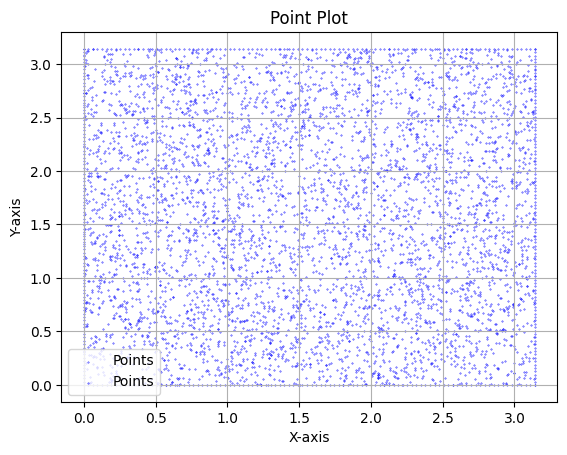

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.scatter(x_collocation, y_collocation, color='blue', marker='o', label='Points',s=0.1)

plt.scatter(x_coords, y_coords, color='blue', marker='o', label='Points',s=0.1)

plt.title("Point Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

#
plt.legend()

#
plt.grid(True)
plt.show()

# Learn F

In [ ]:
x1 = Variable(torch.from_numpy(x_collocation).float(), requires_grad=False).to(device)
y1 = Variable(torch.from_numpy(y_collocation).float(), requires_grad=False).to(device)

label_f1 = -cos(2*x1)*(sin(x1+y1)) - (1+0.5*sin(2*x1))*(cos(x1+y1)) - 2*(-2*sin(2*x1)*sin(2*y1)+cos(x1)*sin(y1)/lamb) -2*(1+x1+y1)*(-4*cos(2*x1)*sin(2*y1)-sin(x1)*sin(y1)/lamb) - (2*(cos(2*x1)-cos(2*y1))+sin(x1+y1)/lamb) -(1+x1+y1)*(4*sin(2*y1)+cos(x1+y1)/lamb)
label_f2 = - (1+0.5*sin(2*x1))*(cos(x1+y1)) - 2*(2*sin(2*x1)*sin(2*y1)+sin(x1)*cos(y1)/lamb) -2*(1+x1+y1)*(4*cos(2*y1)*sin(2*x1)-sin(x1)*sin(y1)/lamb) - (2*(cos(2*x1)-cos(2*y1))+sin(x1+y1)/lamb) -(1+x1+y1)*(-4*sin(2*x1)+cos(x1+y1)/lamb)



In [ ]:
previous_validation_loss = 99999999.0
gap3 = 1
epoch = 0

while epoch < 2000:
    optimizerf.zero_grad()

##------------------------------------Compute Loss-----------------------------------------##

    pred_f_1 = net_2d_f(pt_x_collocation, pt_y_collocation)[:, 0:1]
    pred_f_2 = net_2d_f(pt_x_collocation, pt_y_collocation)[:, 1:2]
    msef_1 = mse_cost_function(pred_f_1, (0.5)*label_f1)
    msef_2 = mse_cost_function(pred_f_2, (0.5)*label_f2)

    loss_f = 0.1*(msef_1 + msef_2)

##------------------------------------Optimize Loss-----------------------------------------##

    loss_f.backward()
    optimizerf.step()

    epoch += 1

    if epoch % 100 == 1:
        print("MSE Error: ", loss_f.item())

MSE Error:  22.500625610351562
MSE Error:  11.635683059692383
MSE Error:  9.549466133117676
MSE Error:  7.3611650466918945
MSE Error:  2.6446471214294434
MSE Error:  0.6418630480766296
MSE Error:  0.2728947103023529
MSE Error:  0.13424570858478546
MSE Error:  0.07774330675601959
MSE Error:  0.04890116676688194
MSE Error:  0.03299257531762123
MSE Error:  0.02345249615609646
MSE Error:  0.017778579145669937
MSE Error:  0.013897079043090343
MSE Error:  0.011453337967395782
MSE Error:  0.009466382674872875
MSE Error:  0.008711175993084908
MSE Error:  0.007017713971436024
MSE Error:  0.006190457381308079
MSE Error:  0.007251002825796604


In [ ]:
previous_validation_loss = 99999999.0
gap3 = 1
epoch = 0

while epoch < 2000:
    optimizerf0.zero_grad()

##------------------------------------Compute Loss-----------------------------------------##

    pred_f_10 = net_2d_f0(pt_x_collocation, pt_y_collocation)[:, 0:1]
    pred_f_20 = net_2d_f0(pt_x_collocation, pt_y_collocation)[:, 1:2]
    msef_10 = mse_cost_function(pred_f_10, (0.4)*label_f1)
    msef_20 = mse_cost_function(pred_f_20, (0.4)*label_f2)
    loss_f0 = 0.1*(msef_10 + msef_20)

##------------------------------------Optimize Loss-----------------------------------------##

    loss_f0.backward()
    optimizerf0.step()

    epoch += 1

    if epoch % 100 == 1:
        print("MSE Error: ", loss_f0.item())

MSE Error:  14.390860557556152
MSE Error:  6.817851543426514
MSE Error:  5.6310200691223145
MSE Error:  3.049683094024658
MSE Error:  0.4730183184146881
MSE Error:  0.10989993810653687
MSE Error:  0.04942430183291435
MSE Error:  0.028349196538329124
MSE Error:  0.019090911373496056
MSE Error:  0.014242869801819324
MSE Error:  0.011198197491466999
MSE Error:  0.009160407818853855
MSE Error:  0.007634009700268507
MSE Error:  0.006820295937359333
MSE Error:  0.005368360783904791
MSE Error:  0.004561861045658588
MSE Error:  0.003969777375459671
MSE Error:  0.003393847495317459
MSE Error:  0.0029952358454465866
MSE Error:  0.0028860331512987614


#Observe Points

In [ ]:
x_ = np.arange(0,np.pi,0.1)
y_ = np.arange(0,np.pi,0.1)

ms_x_ , ms_y_= np.meshgrid(x_,y_)

x_ = np.ravel(ms_x_).reshape(-1,1)
y_ = np.ravel(ms_y_).reshape(-1,1)

pt_x_ = Variable(torch.from_numpy(x_).float(), requires_grad=False).to(device)
pt_y_ = Variable(torch.from_numpy(y_).float(), requires_grad=False).to(device)

In [ ]:
Iterlist = []
Error_decom = []
Error_stan = []

In [ ]:
Error_decom = []
Error_stan = []

#Train

In [ ]:
previous_validation_loss = 99999999.0
gap3 = 1
epoch = 0

while epoch < 50000:
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    optimizerf.zero_grad()
    optimizerf0.zero_grad()
##------------------------------------Compute Loss-----------------------------------------##

    loss = 1*f(pt_x_collocation, pt_y_collocation, bdy_x_collocation, bdy_y_collocation, net_2d_1, net_2d_2, net_2d_f, net_2d_f0, epoch)
    # loss = 1*f_1(pt_x_collocation, pt_y_collocation, bdy_x_collocation, bdy_y_collocation, net_2d_1, epoch)

##------------------------------------Optimize Loss-----------------------------------------##

    loss.backward()
    optimizer1.step()
    optimizer2.step()
    optimizerf.step()
    optimizerf0.step()

    epoch += 1

##----------------------------Result-----------------------------##

    if (epoch) % 200 == 1:
        gap2 = torch.sqrt((((((net_2d_1(pt_x_,pt_y_)+net_2d_2(pt_x_,pt_y_))[:,1:2]) - (1-torch.cos(2*pt_y_))*torch.sin(2*pt_x_) - torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean())/((((1-torch.cos(2*pt_y_))*torch.sin(2*pt_x_) + torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean()))
        gap1 = torch.sqrt((((((net_2d_1(pt_x_,pt_y_)+net_2d_2(pt_x_,pt_y_))[:,0:1]) - (torch.cos(2*pt_x_)-1)*torch.sin(2*pt_y_) - torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean())/((((torch.cos(2*pt_x_)-1)*torch.sin(2*pt_y_) + torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean()))

        # gap2 = torch.sqrt((((((net_2d_1(pt_x_,pt_y_))[:,1:2]) - (1-torch.cos(2*pt_y_))*torch.sin(2*pt_x_) - torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean())/((((1-torch.cos(2*pt_y_))*torch.sin(2*pt_x_) + torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean()))
        # gap1 = torch.sqrt((((((net_2d_1(pt_x_,pt_y_))[:,0:1]) - (torch.cos(2*pt_x_)-1)*torch.sin(2*pt_y_) - torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean())/((((torch.cos(2*pt_x_)-1)*torch.sin(2*pt_y_) + torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean()))

        Iterlist.append(epoch)
        Error_decom.append(0.5*(gap1.cpu().detach().numpy()+gap2.cpu().detach().numpy()))

        # Error_stan.append(0.5*(gap1.cpu().detach().numpy()+gap2.cpu().detach().numpy()))

    if (epoch) % 200 == 1:
        print("-----------------------------------------------------------------------------")
        print("Epoch:",epoch)
        # print("Lambda PDE Loss :", (mse1_r1 + mse1_r2).item())
        # print("Mu PDE Loss :", (mse2_r1 + mse2_r2).item())
        print("Loss :", (loss).item())
        print(gap1.item())

-----------------------------------------------------------------------------
Epoch: 1
Loss : 299.94940185546875
1.0045291185379028
-----------------------------------------------------------------------------
Epoch: 201
Loss : 40.2354621887207
1.0003223419189453
-----------------------------------------------------------------------------
Epoch: 401
Loss : 39.91930389404297
1.000502347946167
-----------------------------------------------------------------------------
Epoch: 601
Loss : 39.8087043762207
1.000661849975586
-----------------------------------------------------------------------------
Epoch: 801
Loss : 39.75080871582031
1.0005948543548584
-----------------------------------------------------------------------------
Epoch: 1001
Loss : 39.70655059814453
1.0003668069839478
-----------------------------------------------------------------------------
Epoch: 1201
Loss : 39.662742614746094
1.0000696182250977
-----------------------------------------------------------------------

#Plotting Prediction

tensor(2.0070, device='cuda:0')
tensor(-1.9929, device='cuda:0')


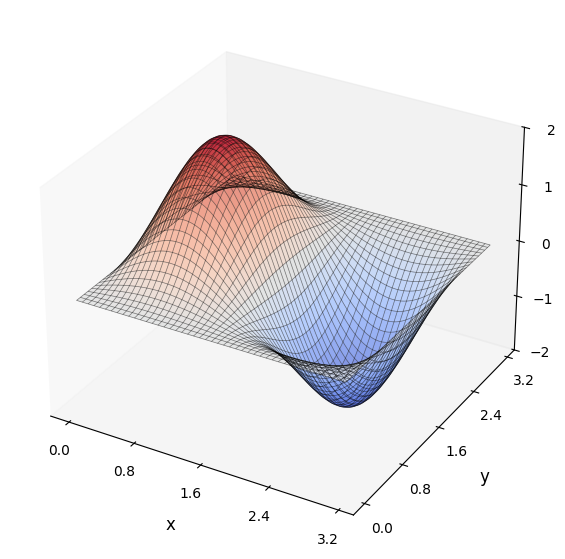

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x_ = np.arange(0,np.pi,0.01)
y_ = np.arange(0,np.pi,0.01)

ms_x_ , ms_y_= np.meshgrid(x_,y_)

x_ = np.ravel(ms_x_).reshape(-1,1)
y_ = np.ravel(ms_y_).reshape(-1,1)

pt_x_ = Variable(torch.from_numpy(x_).float(), requires_grad=False).to(device)
pt_y_ = Variable(torch.from_numpy(y_).float(), requires_grad=False).to(device)

pt_u3 = ((net_2d_2(N*pt_x_,N*pt_y_) + net_2d_1(N*pt_x_,N*pt_y_))[:,1])

# pt_u3 = (net_2d_1(pt_x_,pt_y_))[:,1]

# pt_u3 = (1-torch.cos(2*pt_y_))*torch.sin(2*pt_x_) + torch.sin(pt_x_)*torch.sin(pt_y_)/lamb
##u2 soln


# pt_u3 = -((lamb+1)/lamb)*torch.cos(pt_x_+pt_y_) + 8*torch.cos(2*pt_x_)*torch.sin(2*pt_y_) + (2/lamb)*torch.sin(pt_x_)*torch.sin(pt_y_) - 4*torch.sin(2*pt_y_) - net_2d_f(pt_x_,pt_y_)[:,0:1]
# pt_u3 = -((lamb+1)/lamb)*torch.cos(pt_x_+pt_y_) - 8*torch.cos(2*pt_y_)*torch.sin(2*pt_x_) + (2/lamb)*torch.sin(pt_x_)*torch.sin(pt_y_) + 4*torch.sin(2*pt_x_) - net_2d_f(pt_x_,pt_y_)[:,1:2]

u3 = pt_u3.data.cpu().numpy()
ms_u3 = u3.reshape(ms_x_.shape)


# 표면 그래프 (반투명)
ax.plot_surface(ms_x_, ms_y_, ms_u3, cmap='coolwarm', edgecolor='none', alpha= 0.7)

# 와이어프레임 추가
ax.plot_wireframe(ms_x_, ms_y_, ms_u3, color='black', linewidth=0.5, alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # X축 눈금 개수 제한
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Y축 눈금 개수 제한
ax.zaxis.set_major_locator(MaxNLocator(nbins=4))

ax.set_xlabel("x", fontsize=12, labelpad=10)
ax.set_ylabel("y", fontsize=12, labelpad=10)
ax.set_zlabel("z", fontsize=12, labelpad=10)
# ax.set_title("3D Surface with Wireframe", fontsize=16, fontweight="bold")

ax.grid(False)
# ax.xaxis.pane.fill = False  # xz 평면
# ax.yaxis.pane.fill = False  # yz 평면
# ax.zaxis.pane.fill = False  # z 평면
# ax.view_init(elev=25, azim=220)
ax.set_zlim(-2, 2)

plt.show()
# surf3 = ax.plot_surface(ms_x_,ms_y_,ms_u3,cmap=cm.coolwarm,linewidth=0, antialiased=True)



In [ ]:
gap = torch.sqrt((((((net_2d_1(N*pt_x_,N*pt_y_)+net_2d_2(N*pt_x_,N*pt_y_))[:,1:2]) - (1-torch.cos(2*pt_y_))*torch.sin(2*pt_x_) - torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean())/((((1-torch.cos(2*pt_y_))*torch.sin(2*pt_x_) + torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean()))
print(gap)

tensor(0.9969, device='cuda:0', grad_fn=<SqrtBackward0>)


In [ ]:
gap = torch.sqrt((((((net_2d_1(N*pt_x_,N*pt_y_)+net_2d_2(N*pt_x_,N*pt_y_))[:,0:1]) - (torch.cos(2*pt_x_)-1)*torch.sin(2*pt_y_) - torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean())/((((torch.cos(2*pt_x_)-1)*torch.sin(2*pt_y_) + torch.sin(pt_x_)*torch.sin(pt_y_)/lamb)**2).mean()))
gap

tensor(0.9994, device='cuda:0', grad_fn=<SqrtBackward0>)

#Plot learning curve

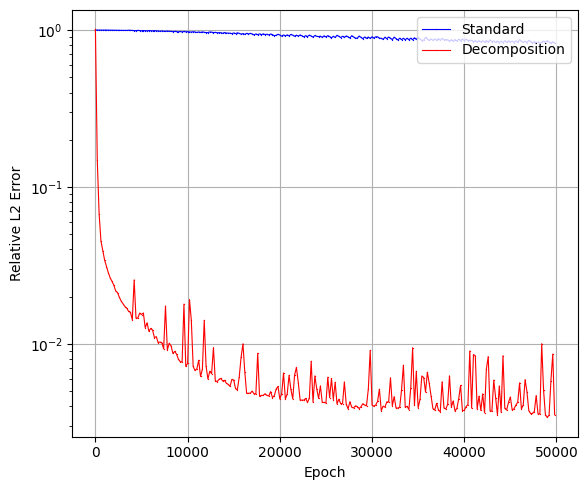

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))


# plt.plot(Iterlist[0:400], Error_list_u1 ,color = 'red', marker='x',markersize=0.3,label='Decompose u1',linewidth = "0.8")
plt.plot(Iterlist, Error_stan ,color = 'blue', marker='x',markersize=0.3,label='Standard',linewidth = "0.8")
plt.plot(Iterlist, Error_decom ,color = 'red', marker='x',markersize=0.3,label='Decomposition',linewidth = "0.8")

# plt.plot(Iterlist[0:400], Error_u1 ,color = 'blue', marker='x',markersize=0.3,label='Standard u1',linewidth = "0.8")



plt.xlabel('Epoch')
plt.ylabel('Relative L2 Error')
# plt.title('Learning Curve')
plt.yscale("log")
plt.grid(True)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()